In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import bz2
import gc
import pickle
from pathlib import Path
import seaborn as sns

In [2]:
!du -sh data/*

578M	data/09_prepared.pkl.bz2
643M	data/10_prepared.pkl.bz2
652M	data/11_prepared.pkl.bz2


In [2]:
%%time
with bz2.open('data/09_prepared.pkl.bz2', 'rb') as sep:
    d9 = pickle.load(sep)

CPU times: user 1min 41s, sys: 4.13 s, total: 1min 45s
Wall time: 1min 45s


In [3]:
%%time
with bz2.open('data/10_prepared.pkl.bz2', 'rb') as octo:
    d10 = pickle.load(octo)

CPU times: user 1min 50s, sys: 4.18 s, total: 1min 54s
Wall time: 1min 54s


In [4]:
%%time
with bz2.open('data/11_prepared.pkl.bz2', 'rb') as nov:
    d11 = pickle.load(nov)

CPU times: user 1min 57s, sys: 4.72 s, total: 2min 1s
Wall time: 2min 1s


In [5]:
dall = pd.concat([d9, d10, d11])

In [6]:
d9.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07,4.210086e+07
mean,7.765869e+05,1.763064e+04,1.045977e+04,1.427065e+00,1.149112e+02,8.446032e+05,1.170384e+07
std,2.032896e+06,1.103226e+04,8.794764e+03,3.101411e+01,1.072201e+02,5.388947e+05,6.760102e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,-2.755000e+00,-1.022110e+03,0.000000e+00,2.000000e+00
25%,0.000000e+00,1.452600e+04,3.850000e+02,1.000000e+00,4.800000e+01,3.650470e+05,5.848724e+06
50%,0.000000e+00,1.943500e+04,1.358100e+04,1.000000e+00,8.900000e+01,8.150010e+05,1.170182e+07
75%,0.000000e+00,2.455800e+04,1.630400e+04,1.000000e+00,1.501100e+02,1.288708e+06,1.755596e+07
max,6.673056e+06,3.866000e+04,2.194300e+04,5.000000e+03,3.840000e+04,1.944074e+06,2.341787e+07


In [7]:
d10.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.612316e+07,4.612316e+07,4.612316e+07,4.612316e+07,4.612316e+07,4.612316e+07,4.612316e+07
mean,1.313093e+06,1.780849e+04,1.038279e+04,1.394533e+00,1.149974e+02,8.502335e+05,1.171058e+07
std,2.847286e+06,1.123255e+04,9.189472e+03,2.953242e+01,1.104653e+02,5.429158e+05,6.760764e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,0.000000e+00,1.452600e+04,3.760000e+02,1.000000e+00,4.920000e+01,3.674040e+05,5.855668e+06
50%,0.000000e+00,1.962800e+04,1.361400e+04,1.000000e+00,8.900000e+01,8.188340e+05,1.171292e+07
75%,0.000000e+00,2.474700e+04,1.637600e+04,1.000000e+00,1.484100e+02,1.296140e+06,1.756632e+07
max,8.280457e+06,3.922700e+04,2.227200e+04,5.000000e+03,1.468320e+04,1.944074e+06,2.341786e+07


In [8]:
d11.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07
mean,1.920266e+06,1.800935e+04,1.027675e+04,1.381354e+00,1.195184e+02,8.543480e+05,1.170871e+07
std,3.755327e+06,1.144678e+04,9.587859e+03,2.943611e+01,1.144673e+02,5.464054e+05,6.761143e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
25%,0.000000e+00,1.452600e+04,3.760000e+02,1.000000e+00,5.200000e+01,3.681530e+05,5.853453e+06
50%,0.000000e+00,1.973000e+04,1.367500e+04,1.000000e+00,9.200000e+01,8.223610e+05,1.170893e+07
75%,0.000000e+00,2.489200e+04,1.662800e+04,1.000000e+00,1.530000e+02,1.303188e+06,1.756278e+07
max,1.020057e+07,4.075900e+04,2.265700e+04,5.000000e+03,1.478400e+04,1.944074e+06,2.341787e+07


In [9]:
dall.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,1.347206e+08,1.347206e+08,1.347206e+08,1.347206e+08,1.347206e+08,1.347206e+08,1.347206e+08
mean,1.354988e+06,1.782224e+04,1.037025e+04,1.400151e+00,1.165308e+02,8.498941e+05,1.170783e+07
std,3.024845e+06,1.124620e+04,9.209531e+03,2.997064e+01,1.108927e+02,5.428865e+05,6.760689e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,-2.755000e+00,-1.022110e+03,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.452600e+04,3.760000e+02,1.000000e+00,4.959000e+01,3.668410e+05,5.852773e+06
50%,0.000000e+00,1.962800e+04,1.361400e+04,1.000000e+00,9.000000e+01,8.188770e+05,1.170806e+07
75%,0.000000e+00,2.477200e+04,1.637700e+04,1.000000e+00,1.510000e+02,1.296261e+06,1.756186e+07
max,1.020057e+07,4.075900e+04,2.265700e+04,5.000000e+03,3.840000e+04,1.944074e+06,2.341787e+07


In [10]:
del d9
del d10
del d11

### buying frequency

In [11]:
res = dall.drop_duplicates('id_doc_int')

In [12]:
res = res.groupby(by=['id_card_int'], as_index=False).count()
res

,id_card_int,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
0,0,10,10,10,10,10,10,10,10,10,10
1,1,2,2,2,2,2,2,2,2,2,2
2,2,1,1,1,1,1,1,1,1,1,1
3,3,17,17,17,17,17,17,17,17,17,17
4,4,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...
1944070,1944070,1,1,1,1,1,1,1,1,1,1
1944071,1944071,1,1,1,1,1,1,1,1,1,1
1944072,1944072,1,1,1,1,1,1,1,1,1,1
1944073,1944073,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='id_doc_int'>

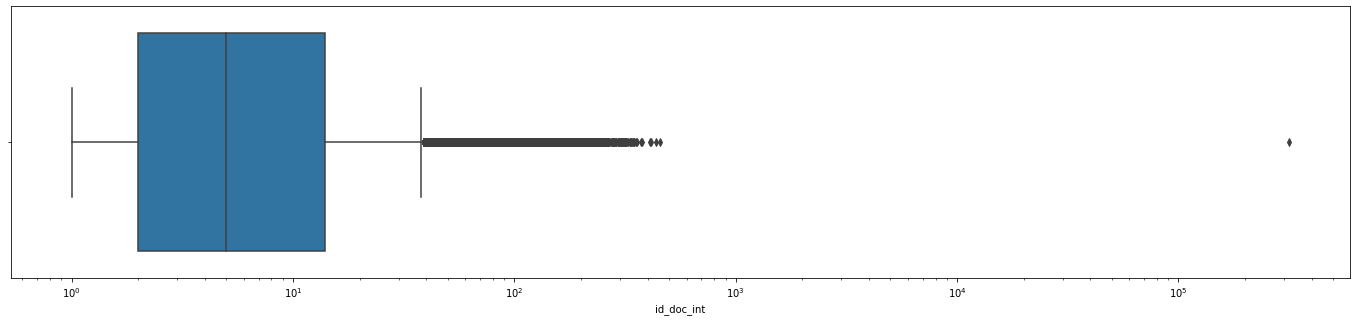

In [13]:
fig, axs = plt.subplots(figsize=(24, 5))
plt.xscale('log')
sns.boxplot(x=res['id_doc_int'], ax=axs, whis=2)

In [15]:
oo_ee_oo_aa = [0.1, 0.2, 0.5, 0.75, 0.9, 0.99999]
threshs = res['id_doc_int'].quantile(oo_ee_oo_aa)
threshs

0.10000      1.0000
0.20000      1.0000
0.50000      5.0000
0.75000     14.0000
0.90000     32.0000
0.99999    325.7963
Name: id_doc_int, dtype: float64

In [16]:
selected = res[res['id_doc_int'] > threshs[oo_ee_oo_aa[-1]]]
print(len(selected))
selected

20


,id_card_int,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
137816,137816,356,356,356,356,356,356,356,356,356,356
317600,317600,414,414,414,414,414,414,414,414,414,414
421742,421742,374,374,374,374,374,374,374,374,374,374
531034,531034,411,411,411,411,411,411,411,411,411,411
542660,542660,378,378,378,378,378,378,378,378,378,378
620767,620767,348,348,348,348,348,348,348,348,348,348
858233,858233,334,334,334,334,334,334,334,334,334,334
875116,875116,328,328,328,328,328,328,328,328,328,328
883386,883386,316277,316277,316277,316277,316277,316277,316277,316277,316277,316277
914348,914348,439,439,439,439,439,439,439,439,439,439


### total sum

In [17]:
res = dall.groupby(by=['id_doc_int', 'id_card_int'], as_index=False).sum()
res.head()

,id_doc_int,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green
0,0,457312,0,92799,42992,3.0,274.0,0
1,1,50796,0,203596,118575,11.0,790.0,0
2,2,1425208,0,106581,20878,9.0,396.0,0
3,3,1164741,0,41562,30465,2.0,228.0,0
4,4,1438933,0,347787,178722,19.0,1597.0,0


<AxesSubplot:xlabel='sum'>

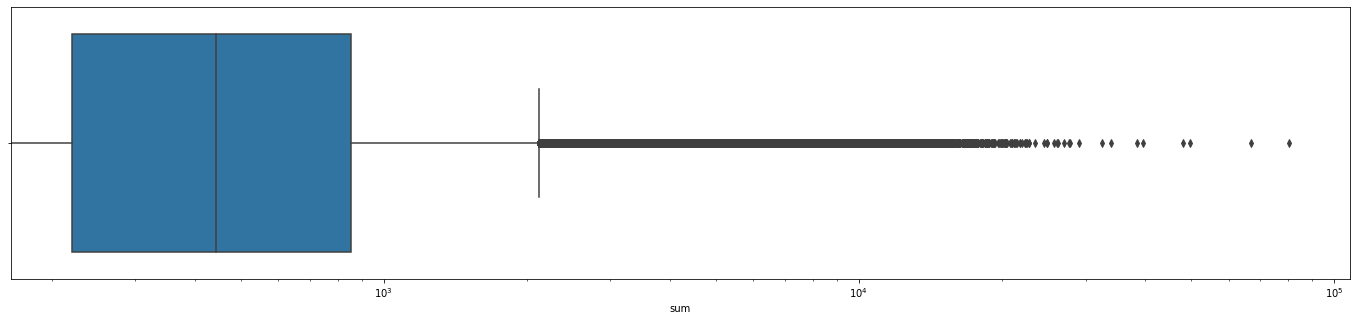

In [18]:
fig, axs = plt.subplots(figsize=(24, 5))
plt.xscale('log')
sns.boxplot(x=res['sum'], ax=axs, whis=2)

In [19]:
threshs = res['sum'].quantile(oo_ee_oo_aa)
threshs

0.10000      119.000000
0.20000      186.000000
0.50000      443.800000
0.75000      853.000000
0.90000     1486.880000
0.99999    15234.397047
Name: sum, dtype: float64

In [20]:
selected2 = res[res['sum'] > threshs[oo_ee_oo_aa[-1]]]
print(len(selected2))
selected2

235


,id_doc_int,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green
54458,54458,1524177,0,36628,574925,73.262,15692.35,0
240388,240388,588107,0,953194,952850,166.654,19189.75,0
254313,254313,636272,624423744,1574107,1193343,147.262,15429.50,0
309825,309825,225201,508056822,1940589,1326706,171.319,17293.17,0
363079,363079,968818,812026446,2074274,1337639,172.241,15360.00,0
...,...,...,...,...,...,...,...,...
23096236,23096237,1028081,0,115370,96345,100.000,19600.00,0
23134710,23134711,636272,526982031,1473994,1029597,147.442,15534.87,0
23345807,23345808,1263823,732896196,1655535,1082866,115.891,19133.59,0
23346465,23346466,262976,780329862,1401406,1043954,139.049,20971.46,0


### total sum per months

In [21]:
res = dall.groupby(by='id_card_int', as_index=False).sum()
res.head()

,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
0,0,231043574,866644,306216,50.270,3607.20,0,571793813
1,1,0,36458,15062,3.000,249.00,0,16392664
2,2,0,210848,130068,16.000,1485.00,0,96048360
3,3,250996423,941363,631629,67.652,8561.85,0,901351002
4,4,0,1295064,802093,83.788,8506.62,1,743216437


<AxesSubplot:xlabel='sum'>

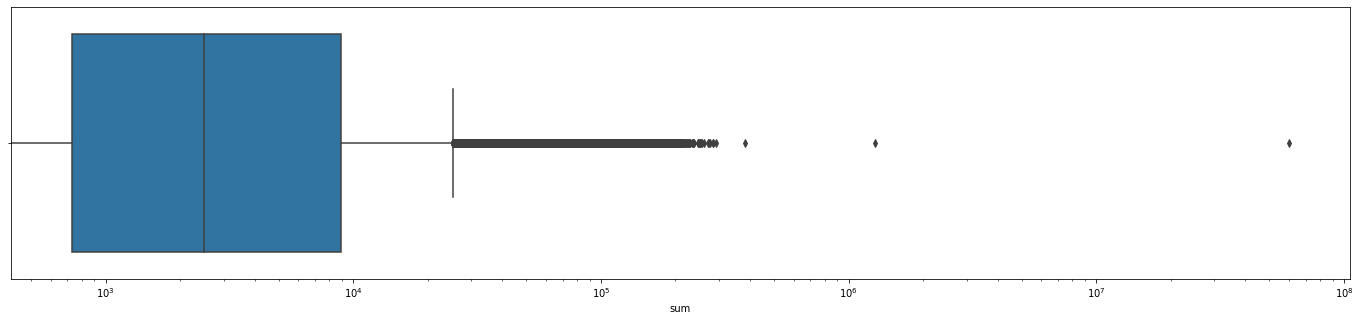

In [22]:
fig, axs = plt.subplots(figsize=(24, 5))
plt.xscale('log')
sns.boxplot(x=res['sum'], ax=axs, whis=2)

In [23]:
threshs = res['sum'].quantile(oo_ee_oo_aa)
threshs

0.10000       281.000000
0.20000       552.330000
0.50000      2495.560000
0.75000      8917.000000
0.90000     22412.762000
0.99999    234051.509717
Name: sum, dtype: float64

In [24]:
selected3 = res[res['sum'] > threshs[oo_ee_oo_aa[-1]]]
print(len(selected3))
selected3

20


,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
6581,6581,984302240,24681734,15247803,2663.489,250633.89,4,15418229275
46998,46998,7557984571,23939356,9015384,1804.501,246953.70,3,12808884776
57748,57748,4789896930,23614397,17415516,1804.985,252742.44,13,17678461084
158714,158714,7208462940,29343831,12784010,2689.907,251463.90,1,13778911874
163661,163661,10131121094,28129443,6056744,2492.074,235904.71,1,16551927001
280312,280312,3074643604,39076919,18179992,2624.737,248775.63,3,21254284164
356029,356029,7064762477,30847097,20205268,2277.233,272201.46,3,15659043816
365279,365279,1897821691,20802369,10155211,2204.634,235535.90,1,11824513964
421742,421742,0,36402811,25810857,2512.040,256572.86,1013,24761551556
478842,478842,8199936044,21574012,5889838,2072.511,271251.47,0,12094944024


### negs

In [42]:
qs = dall.loc[(dall['quantity'] > 0) & (dall['sum'] < 0)].drop_duplicates()
qs

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206092,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,1.268,-470.43,False,1301664,11939194
4206102,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,1.268,-470.43,False,1419650,22549976
4210124,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,1.084,-402.16,False,1035577,6745380
4218019,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,0.001,-0.37,False,126995,16694740
4218021,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,2.375,-881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...,...,...
5382630,2020-09-04 09:13:44,8B5F8150-76EE-EA11-B444-005056A7539A,0,8593402,23074,19269,0.692,-256.73,False,1538576,12752264
5396780,2020-09-04 08:37:49,1CC214FB-70EE-EA11-B444-005056A7539A,0,4916790,23074,19269,1.236,-458.56,False,906517,2630312
5438901,2020-09-04 09:28:21,E6F17E03-78EE-EA11-B444-005056A7539A,0,5931979,23074,19269,0.572,-212.21,False,1102820,21125316
5450157,2020-09-04 09:21:17,CD1BCB2C-77EE-EA11-B444-005056A7539A,0,3290674,23074,19269,0.915,-339.47,False,574393,18763274


In [43]:
sq = dall.loc[(dall['quantity'] < 0) & (dall['sum'] > 0)].drop_duplicates()
sq

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
4206093,2020-09-04 09:10:21,827B9591-75EE-EA11-B444-005056A7539A,0,7009929,23074,19269,-1.268,470.43,False,1301664,11939194
4206103,2020-09-04 09:09:24,F6807973-75EE-EA11-B444-005056A7539A,0,7707981,23074,19269,-1.268,470.43,False,1419650,22549976
4210123,2020-09-04 08:37:00,49C21AF5-70EE-EA11-B444-005056A7539A,0,5554550,23074,19269,-1.084,402.16,False,1035577,6745380
4218020,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-0.001,0.37,False,126995,16694740
4218022,2020-09-04 08:43:37,B681FEE3-71EE-EA11-B444-005056A7539A,0,0643258,23074,19269,-2.375,881.13,False,126995,16694740
...,...,...,...,...,...,...,...,...,...,...,...
5376952,2020-09-04 08:37:59,0F874EE9-70EE-EA11-B444-005056A7539A,0,0504982,23074,19269,-2.616,970.54,False,100408,1420209
5382631,2020-09-04 09:13:44,8B5F8150-76EE-EA11-B444-005056A7539A,0,8593402,23074,19269,-0.692,256.73,False,1538576,12752264
5396781,2020-09-04 08:37:49,1CC214FB-70EE-EA11-B444-005056A7539A,0,4916790,23074,19269,-1.236,458.56,False,906517,2630312
5438902,2020-09-04 09:28:21,E6F17E03-78EE-EA11-B444-005056A7539A,0,5931979,23074,19269,-0.572,212.21,False,1102820,21125316


In [62]:
idcssq = sq['id_card_int'].unique()

In [63]:
idcsqs = qs['id_card_int'].unique()

In [65]:
yy = set(list(idcssq))
nn = set(list(idcsqs))
diff = nn.difference(yy)
diff

{322028}

they re almost all have pairs, looks like cancellation of purchase, so I ll add only 1 value

In [69]:
selectedall = pd.concat([selected, selected2, selected3])
outs = selectedall.drop_duplicates('id_card_int')['id_card_int'].to_list()
outs.append(list(diff)[0])
outs = set(outs)
print(len(outs))

outs

188


{48,
 200,
 280,
 301,
 6581,
 14078,
 46998,
 57748,
 83597,
 84246,
 85774,
 97964,
 102178,
 106460,
 122921,
 125230,
 129282,
 129347,
 132928,
 137816,
 143568,
 154168,
 158455,
 158714,
 161838,
 163161,
 163661,
 174842,
 197882,
 203105,
 225201,
 255252,
 259344,
 262976,
 274667,
 280312,
 286147,
 297366,
 303360,
 304502,
 316707,
 317600,
 318708,
 320393,
 322028,
 339042,
 343872,
 348919,
 356029,
 362510,
 365279,
 368551,
 373013,
 384923,
 388932,
 414158,
 421742,
 430060,
 442230,
 478842,
 488719,
 497966,
 508835,
 529325,
 531034,
 542660,
 544290,
 568930,
 588107,
 588167,
 605828,
 620767,
 627128,
 636272,
 639106,
 642430,
 646641,
 648111,
 675503,
 677380,
 682426,
 686321,
 689349,
 702305,
 709916,
 718802,
 784343,
 792141,
 795003,
 800805,
 816031,
 841377,
 858233,
 865880,
 875116,
 883386,
 913254,
 914348,
 916533,
 927991,
 931261,
 935791,
 939593,
 943480,
 948175,
 963262,
 968818,
 975892,
 1005446,
 1010784,
 1012899,
 1028081,
 1052167,
